<a href="https://colab.research.google.com/github/goraprince15/SAIL-x-Baseline-Hackathon/blob/main/Face_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [2]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
    import os

# List the contents of the extracted directory
print(os.listdir('data'))

['Submission.csv', 'fer2013']


In [3]:
print(os.listdir('data/fer2013'))

['fer2013']


In [4]:
print(os.listdir('data/fer2013/fer2013/'))

['fer2013.bib', 'README', 'fer2013.csv']


In [8]:
import pandas as pd
csv_path = 'data/fer2013/fer2013/fer2013.csv'
fer_data = pd.read_csv(csv_path)
print(fer_data.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [9]:
import numpy as np
fer_data['pixels'] = fer_data['pixels'].apply(lambda x: np.fromstring(x, sep=' ').reshape(48, 48))
print(fer_data.head())

   emotion                                             pixels     Usage
0        0  [[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...  Training
1        0  [[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...  Training
2        2  [[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...  Training
3        4  [[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...  Training
4        6  [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  Training


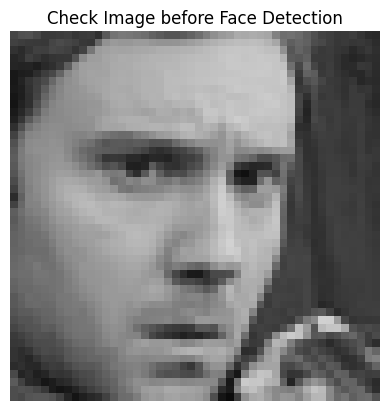

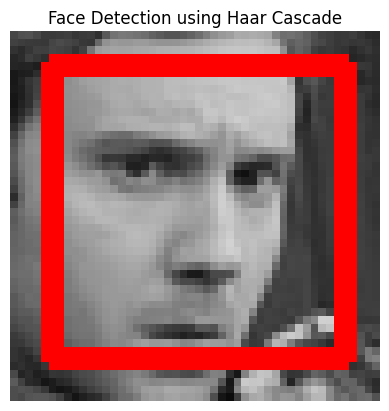

In [37]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Display the first image in the dataset
example_shape = X_train.shape[1:]  # Get the shape of a single image from the dataset
sample_image = X_train[0].copy().reshape(example_shape)  # Copy and reshape correctly

# Ensure pixel values are between 0-255
sample_image = np.clip(sample_image * 255, 0, 255).astype(np.uint8)

# Debugging: Plot image before face detection
plt.imshow(sample_image, cmap='gray')
plt.title('Check Image before Face Detection')
plt.axis('off')
plt.show()

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the example image
faces = face_cascade.detectMultiScale(sample_image, scaleFactor=1.1, minNeighbors=5)

# Draw rectangle(s) around the detected face(s)
for (x, y, w, h) in faces:
    cv2.rectangle(sample_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with detected face(s)
plt.imshow(sample_image, cmap='gray')
plt.title('Face Detection using Haar Cascade')
plt.axis('off')
plt.show()

In [11]:
from re import X
train_data = fer_data[fer_data['Usage'] == 'Training']
test_data = fer_data[fer_data['Usage'] == 'PublicTest']
val_data = fer_data[fer_data['Usage'] == 'PrivateTest']
X_train = np.stack(train_data['pixels'].values)
X_val = np.stack(val_data['pixels'].values)
y_val = val_data['emotion'].values
y_train = train_data['emotion'].values
X_test = np.stack(test_data['pixels'].values)
y_test = test_data['emotion'].values
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)
X_val = X_val.reshape(-1, 48, 48, 1)
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0
X_train.shape, X_test.shape, X_val.shape

((28709, 48, 48, 1), (3589, 48, 48, 1), (3589, 48, 48, 1))

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)
from tensorflow.keras import layers, models
model = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dropout(0.5),
                           layers.Dense(7, activation='softmax')
                           ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training**

In [13]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (28709, 48, 48, 1)
Shape of y_train: (28709, 7)
Shape of X_val: (3589, 48, 48, 1)
Shape of y_val: (3589, 7)


In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_data['emotion'].values, num_classes=7)
y_val = to_categorical(val_data['emotion'].values, num_classes=7)
y_test = to_categorical(test_data['emotion'].values, num_classes=7)


print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of y_train: (28709, 7)
Shape of y_val: (3589, 7)
Shape of y_test: (3589, 7)


In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 107s 234ms/step - accuracy: 0.2379 - loss: 1.8216 - val_accuracy: 0.3670 - val_loss: 1.6232
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 104s 231ms/step - accuracy: 0.3831 - loss: 1.5846 - val_accuracy: 0.4522 - val_loss: 1.4313
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 102s 227ms/step - accuracy: 0.4481 - loss: 1.4449 - val_accuracy: 0.4684 - val_loss: 1.3673
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 228ms/step - accuracy: 0.4717 - loss: 1.3720 - val_accuracy: 0.5074 - val_loss: 1.2883
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - accuracy: 0.5060 - loss: 1.3042 - val_accuracy: 0.5249 - val_loss: 1.2295
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.5278 - loss: 1.2493 - val_accuracy: 0.5419 - val_loss: 1.2171
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.5451 - loss: 1.1987 - val_accuracy: 0.5394 - val_loss: 1.1929
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 222ms/step - accuracy: 0.5537 -

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5691 - loss: 1.3001
Test Accuracy: 0.56
Test Loss: 1.31


**Plot Training & Validation Accuracy**

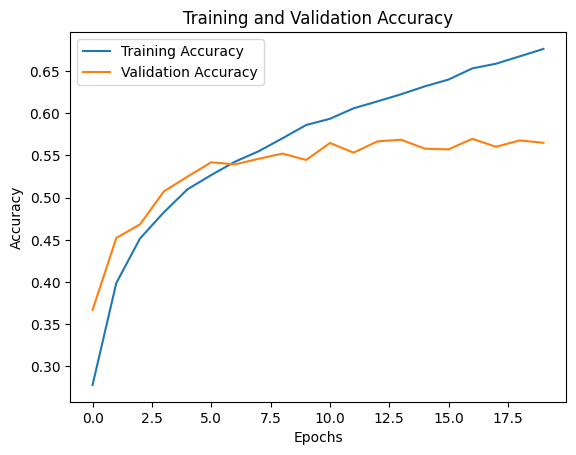

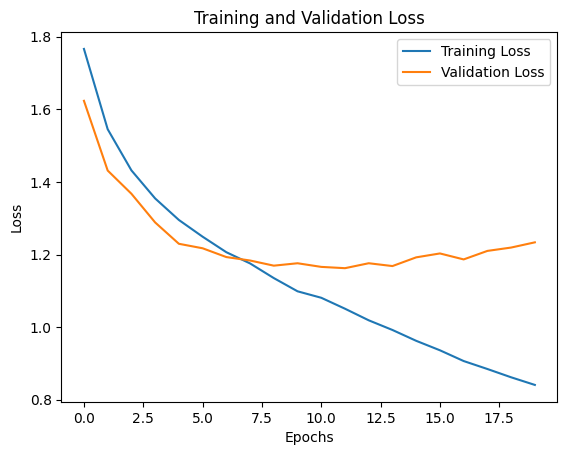

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Get the index of the highest probability class for each prediction
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step


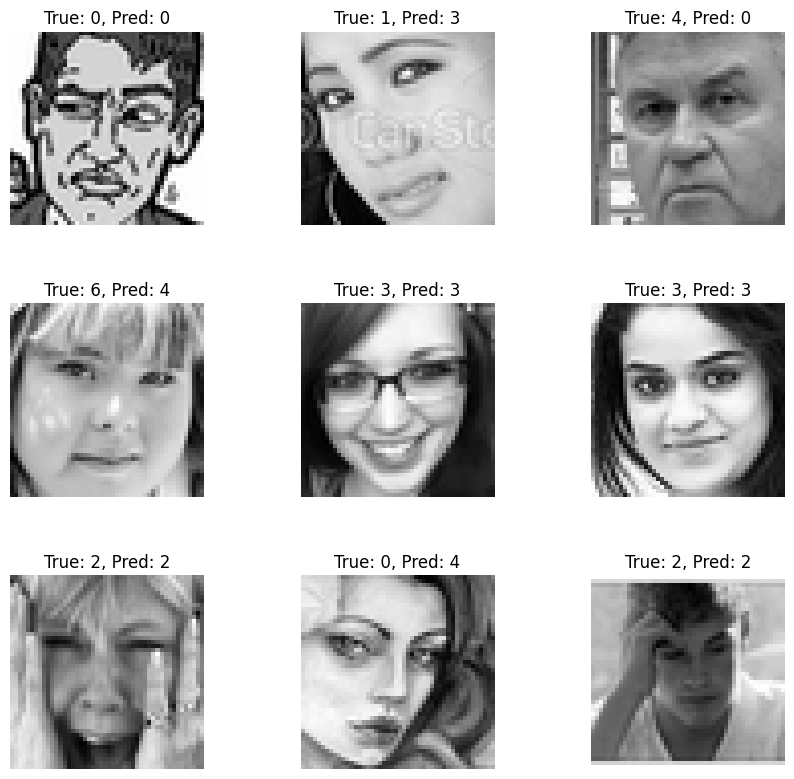

In [21]:
# Plot sample test images with predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(X_test[i].reshape(48, 48), cmap='gray')
    axes[i].set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()

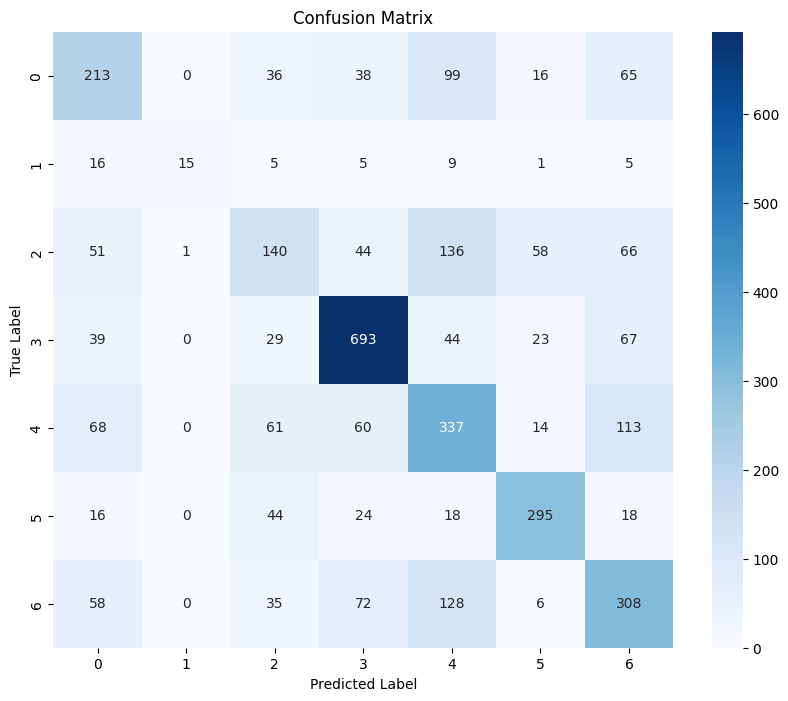

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       467
           1       0.94      0.27      0.42        56
           2       0.40      0.28      0.33       496
           3       0.74      0.77      0.76       895
           4       0.44      0.52      0.47       653
           5       0.71      0.71      0.71       415
           6       0.48      0.51      0.49       607

    accuracy                           0.56      3589
   macro avg       0.60      0.50      0.52      3589
weighted avg       0.56      0.56      0.55      3589



Transfer **Learning**

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np

# Convert X_train, X_val, and X_test to 3 channels
X_train = np.repeat(X_train, 3, axis=-1)
X_val = np.repeat(X_val, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

print(f"New shape of X_train: {X_train.shape}")  # Check the new shape to verify


base_model.trainable = False  # Freeze the pretrained layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

New shape of X_train: (28709, 48, 48, 3)
Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 931s 1s/step - accuracy: 0.3371 - loss: 1.6796 - val_accuracy: 0.4035 - val_loss: 1.5472
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1010s 1s/step - accuracy: 0.4074 - loss: 1.5365 - val_accuracy: 0.3976 - val_loss: 1.5240
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 938s 1s/step - accuracy: 0.4191 - loss: 1.4973 - val_accuracy: 0.4057 - val_loss: 1.5290
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - accuracy: 0.4353 - loss: 1.4642 - val_accuracy: 0.4218 - val_loss: 1.4839
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 921s 1s/step - accuracy: 0.4465 - loss: 1.4472 - val_accuracy: 0.4271 - val_loss: 1.4919
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 950s 1s/step - accuracy: 0.4604 - loss: 1.4128 - val_accuracy: 0.4252 - val_loss: 1.4784
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 997s 1s/step - accuracy: 0.4701 - loss: 1.3898 - val_accuracy: 0.4257 - val_loss: 1.4718
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 901s 1s/step - 

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 100s 886ms/step - accuracy: 0.4325 - loss: 1.5229
Test Accuracy: 0.4352187216281891
Test Loss: 1.4986709356307983


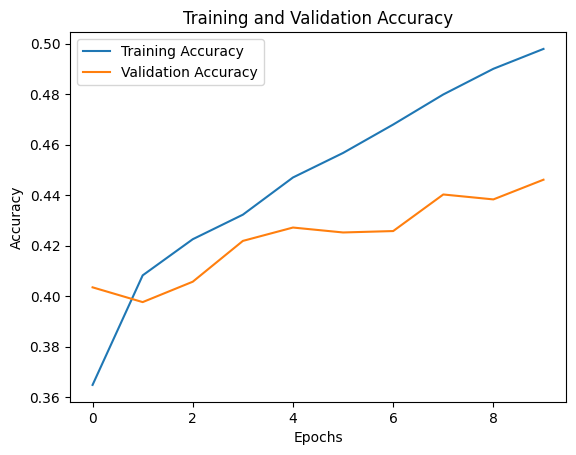

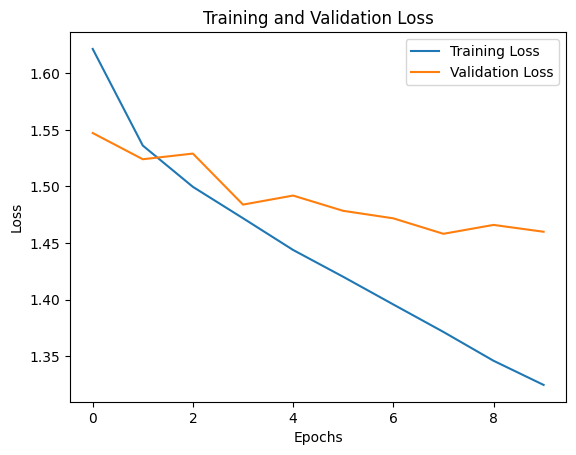

In [27]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [28]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 103s 915ms/step


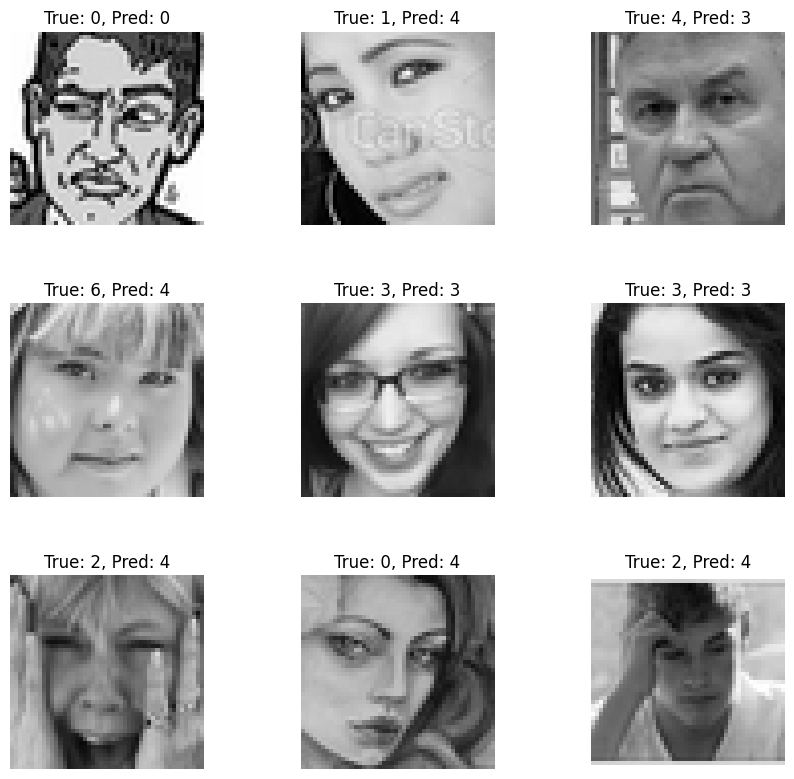

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(X_test[i].reshape(48, 48, 3), cmap='gray')
    axes[i].set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

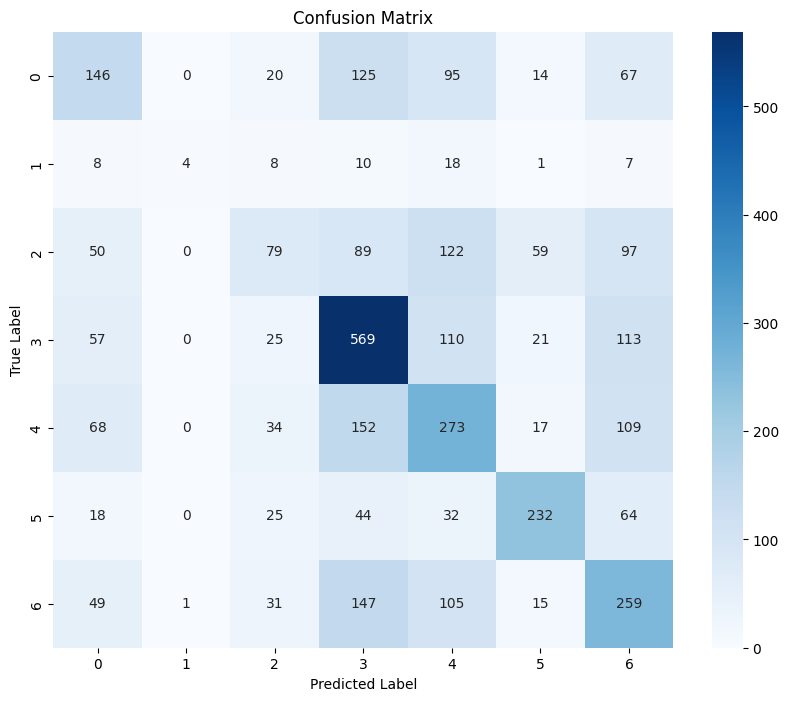

In [30]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.31      0.34       467
           1       0.80      0.07      0.13        56
           2       0.36      0.16      0.22       496
           3       0.50      0.64      0.56       895
           4       0.36      0.42      0.39       653
           5       0.65      0.56      0.60       415
           6       0.36      0.43      0.39       607

    accuracy                           0.44      3589
   macro avg       0.48      0.37      0.38      3589
weighted avg       0.44      0.44      0.42      3589

